In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F 

from utils.gif_loss import plot_loss

import utils.tavr_torch as tavr_torch
from utils.tavr_torch import TAVR_3_Frame, TAVR_1_Frame, TAVR_Sequence, tavr_dataloader
from utils.visualization import display_grid, z_stretch, visualize_frame, set_figsize, get_central_slices
from utils.loss_functions import batch_l2_loss
from utils.run_model import train, test, save, load, get_loss_history
from Models.basic_models import average_model, two_layer_basic, post_process



set_figsize(20, 15)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
def retrieve_losses(histories, loss_name='train_c'):
    return [np.array(history[loss_name]) for history in histories]

def get_final_loss(histories, loss_name='valid'):
    return [history[loss_name][-1] for history in histories]

In [56]:
models = ["Model 4 (Basic+PixelNorm) Run 1",
         "Model 6 (2d CNN+PixelNorm) Run 0",
         "Model 6 (2d CNN+PixelNorm-Adam) Run 1",
         "Model 7 (two_layer_resnet) Run 0",
          "Model 8 (Basic+SliceNorm) Run 0"]
          

In [58]:
model_hists = [get_loss_history(model) for model in models]

In [64]:
losses = retrieve_losses(model_hists, "valid")

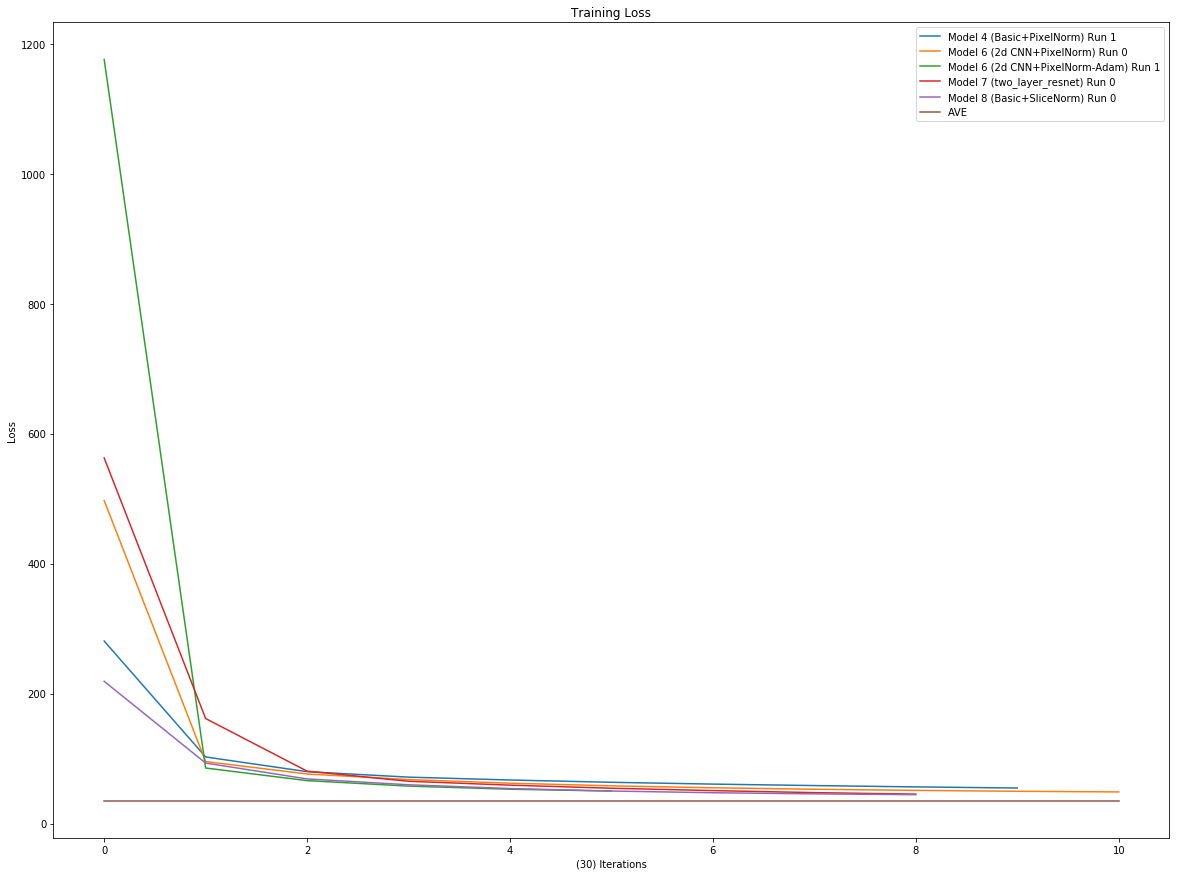

In [67]:
plot_loss(losses + [35.150 * np.ones(11)], models + ["AVE"], marker=False, x_axis="(30) Iterations")

In [71]:
get_final_loss(model_hists, "valid")

[54.7066650390625,
 48.718040466308594,
 50.07676315307617,
 45.33277893066406,
 44.44083786010742]